# Intelligent Agents: Reflex-Based Agents for the Vacuum-cleaner World

Student Name: Max Link 48511338

I have used the following AI tools: Chat GPT for explanations of concepts.



OpenAI. "ChatGPT with Browsing Capability." 2024. https://openai.com.



I understand that my submission needs to be my own work: ML

## Instructions

Total Points: Undergrads 100 + 5 bonus / Graduate students 110

Complete this notebook. Use the provided notebook cells and insert additional code and markdown cells as needed. Submit the completely rendered notebook as a HTML file.

In Visual Studio Code: Use Export (click on ... in the menu bar) to save your notebook as a HTML file.

In Colab you need to save the notebook on GoogleDrive and then add the following block
```
!pip install nbconvert

from google.colab import drive
drive.mount('/content/drive')
!jupyter nbconvert --to html /content/drive/MyDrive/Colab\ Notebooks/Copy\ of\ robot_vacuum.ipynb
```

You will need to fix the file location on your GoogleDrive.

## Introduction

In this assignment you will implement a simulator environment for an automatic vacuum cleaner robot, a set of different reflex-based agent programs, and perform a comparison study for cleaning a single room. Focus on the __cleaning phase__ which starts when the robot is activated and ends when the last dirty square in the room has been cleaned. Someone else will take care of the agent program needed to navigate back to the charging station after the room is clean.

## PEAS description of the cleaning phase

__Performance Measure:__ Each action costs 1 energy unit. The performance is measured as the sum of the energy units used to clean the whole room.

__Environment:__ A room with $n \times n$ squares where $n = 5$. Dirt is randomly placed on each square with probability $p = 0.2$. For simplicity, you can assume that the agent knows the size and the layout of the room (i.e., it knows $n$). To start, the agent is placed on a random square.

__Actuators:__ The agent can clean the current square (action `suck`) or move to an adjacent square by going `north`, `east`, `south`, or `west`.

__Sensors:__ Four bumper sensors, one for north, east, south, and west; a dirt sensor reporting dirt in the current square.  


## The agent program for a simple randomized agent

The agent program is a function that gets sensor information (the current percepts) as the arguments. The arguments are:

* A dictionary with boolean entries for the for bumper sensors `north`, `east`, `west`, `south`. E.g., if the agent is on the north-west corner, `bumpers` will be `{"north" : True, "east" : False, "south" : False, "west" : True}`.
* The dirt sensor produces a boolean.

The agent returns the chosen action as a string.

Here is an example implementation for the agent program of a simple randomized agent:  

In [52]:
import numpy as np

actions = ["north", "east", "west", "south", "suck"]

def simple_randomized_agent(bumpers, dirty):
    return np.random.choice(actions) #randomly picks actions with np.random.choice....
    #this is a bad implementation
    #our solution should be generalizable to a larger room than 5x5
    #if you give this an infinite amount of time, it will clean everything!!! - guarantees in CS like that: infinite amount of memory/time, etc.... but not efficient

In [53]:

# define percepts (current location is NW corner and it is dirty)
bumpers = {"north" : True, "east" : False, "south" : False, "west" : True}
dirty = True

# call agent program function with percepts and it returns an action
simple_randomized_agent(bumpers, dirty)

'north'

__Note:__ This is not a rational intelligent agent. It ignores its sensors and may bump into a wall repeatedly or not clean a dirty square. You will be asked to implement rational agents below.

## Simple environment example

We implement a simple simulation environment that supplies the agent with its percepts.
The simple environment is infinite in size (bumpers are always `False`) and every square is always dirty, even if the agent cleans it. The environment function returns a performance measure which is here the number of cleaned squares (since the room is infinite and all squares are constantly dirty, the agent can never clean the whole room as required in the PEAS description above). The energy budget of the agent is specified as `max_steps`.

In [54]:
#create the environment for the agent....
#verbose = True prints every action, verbose = false only prints important output

def simple_environment(agent, max_steps, verbose = True): #max_steps = how many things the agent can do before its tired....
    num_cleaned = 0 #how you now you are done cleaning...

    for i in range(max_steps): #basic loop
        dirty = True #dirty state
        bumpers = {"north" : False, "south" : False, "west" : False, "east" : False} #bumpers are always false, everything always dirty...

        action = agent(bumpers, dirty) #passing bumpers and dirty to agent function.... agent returns an action either "north, south, east, west"
        if (verbose): print("step", i , "- action:", action)

        if (action == "suck"): #count to get one everytime you clean....
            num_cleaned = num_cleaned + 1

    return num_cleaned


Do one simulation run with a simple randomized agent that has

---

enough energy for 20 steps.

In [130]:
#python can take functions as arguments, funtion agent passed
#max_steps = 20, so 20 things the agent can do
#verbose is a default arg so not passed here

simple_environment(simple_randomized_agent, max_steps = 20)

#cleaned 4 times

#what we should do is down below in Tasks...

#we need to make a better environment than this one...

#environment should always monitor if everything is clean or not... if everything is clean then stop the agent
#our performance function needs to be different than def simple_environment..... needs to count how many actions it took to clean the room, not just if the room is clean or not
#need to run the experiment multiple times and get the average behavior....

step 0 - action: east
step 1 - action: suck
step 2 - action: suck
step 3 - action: north
step 4 - action: west
step 5 - action: suck
step 6 - action: suck
step 7 - action: south
step 8 - action: west
step 9 - action: west
step 10 - action: south
step 11 - action: suck
step 12 - action: suck
step 13 - action: south
step 14 - action: suck
step 15 - action: suck
step 16 - action: east
step 17 - action: south
step 18 - action: west
step 19 - action: north


8

# Tasks

## General [10 Points]

1. Make sure that you use the latest version of this notebook. Sync your forked repository and pull the latest revision.
2. Your implementation can use libraries like math, numpy, scipy, but not libraries that implement intelligent agents or complete search algorithms. Try to keep the code simple! In this course, we want to learn about the algorithms and we often do not need to use object-oriented design.
3. You notebook needs to be formatted professionally.
    - Add additional markdown blocks for your description, comments in the code, add tables and use mathplotlib to produce charts where appropriate
    - Do not show debugging output or include an excessive amount of output.
    - Check that your PDF file is readable. For example, long lines are cut off in the PDF file. You don't have control over page breaks, so do not worry about these.
4. Document your code. Add a short discussion of how your implementation works and your design choices. (commented my code thoroughly to meet this requirement)


## Task 1: Implement a simulation environment [20 Points]

The simple environment above is not very realistic. Your environment simulator needs to follow the PEAS description from above. It needs to:

* Initialize the environment by storing the state of each square (clean/dirty) and making some dirty. ([Help with random numbers and arrays in Python](https://github.com/mhahsler/CS7320-AI/blob/master/HOWTOs/random_numbers_and_arrays.ipynb))
* Keep track of the agent's position.
* Call the agent function repeatedly and provide the agent function with the sensor inputs.  
* React to the agent's actions. E.g, by removing dirt from a square or moving the agent around unless there is a wall in the way.
* Keep track of the performance measure. That is, track the agent's actions until all dirty squares are clean and count the number of actions it takes the agent to complete the task.

The easiest implementation for the environment is to hold an 2-dimensional array to represent if squares are clean or dirty and to call the agent function in a loop until all squares are clean or a predefined number of steps have been reached (i.e., the robot runs out of energy).

The simulation environment should be a function like the `simple_environment()` and needs to work with the simple randomized agent program from above. **Use the same environment for all your agent implementations in the tasks below.**

*Note on debugging:* Debugging is difficult. Make sure your environment prints enough information when you use `verbose = True`. Also, implementing a function that the environment can use to displays the room with dirt and the current position of the robot at every step is very useful.  

In [170]:
#Your code and description goes here
#Make a better environment - sense if everything is clean & how many actions it took. Better than def simple_environment function
#THIS IMPLEMENTED ENV SHOULD STAY THE SAME ACROSS ALL AGENTS ....
import numpy as np #numpy import to run this env function without running any other code cells. Numpy used for random array generation in env function.

def coords_array(arr, n): #creates an array of x and y coords that map to the env
    #coord_array = []
    coords_array = [[] for _ in range(n*n)] #makes 25 empty [] lists. n = 5 so 5x5 = 25. The _ ignores the loop variable and only loops the # of times specified, which is 25.
    y = 0
    x = 0
    index = 0 #index of array to append two values (x & y) at the same index pos
    for row in arr:
      #y increments here
      #y += 1
      for item in row:
        #x increments here
        # x += 1
        #should append lists of ([1, 1], [2, 1], [3, 1]....) starting at [1,1] instead of [0,0] like hardcoded cords_arr above...
        coords_array[index].append(x) #copy dirtyStates function for the coords...
        coords_array[index].append(y)
       #print(coords_array)
        index += 1 #increment at end to pick index 0 first so that array check is at 0 index to start
        x+= 1 #increment at end to append 0 value first so array starts at [0,0] grid
      y += 1 #at end to append 0 value first
      x = 0 #reset x coord so that x only goes from range 0 to 4
    return coords_array


def env(agent, max_steps, envSize, verbose = False, min_output = True): #max_steps = how many things the agent can do before its tired....
    #initialize an environment nxn. n = 5 so 5x5=25. Set some squares to clean & some to dirty
    n = envSize #variable for the size of the array, which is the size of the squares. Just N? Or is using an r and c vars better?
    #initialize a new random number generator
    rng = np.random.default_rng()

    #use the rng to generate a 1-d array with either clean or dirty as the values chosen - array has to start as 2-D
    arr = rng.choice(['C', 'D'], size = (n, n), p = [0.8, 0.2]) #Clean has a 0.8 prob, and dirty a 0.2 prob

    #initialize an empty array to hold the coordiantes
    #coord_array = []

    #hard code coord_array for now
    env_coords = coords_array(arr, n) #call coords_array function to create x and y coord grid
    # if(verbose): print("ENV_COORDS:", env_coords) #coord printing INCORRECT
    #coord_array = [[0,0], [1,0], [2,0], [3,0], [4,0], [5,0], [0,1],.....] #continue building this out and then build this out dynamically for nxn size room
    #allocate an array of size nxn that holds the array coordinates -- building env row by row so put in coords row by row
    #(0,0), (0,1), (0,2)

    pm = 0 #performance measure. Updates when the agent moves and when the agent cleans a room


    if(min_output == True): print(arr) #environment

    #stores the clean and dirty squares in arr_states variable
    # arr_states = dirtyStates(arr)
    arr_pos = 0 #iterates through arr_states & grabs dirty state out of arr_states in the below for loop. Do not use i to iterate through arr_states because you only want to grab as many states as you have which in this case is nxn = 5x5 = 25.

    #Determine env walls
    #bumpers array starts with everything false, which means there are no walls in the env yet
    #bumpers array randomization test
    #bumpers array starts with everything false, which means there are no walls in the env yet
    bumpers = {"north" : False, "south" : False, "west" : False, "east" : False} #bumpers start as false, can go any direction. Easier to set to True later.


    #randomly choose coords from env_coords to act as agent x & y
    start = 0
    end = (n*n) #5x5 = 25, so 25 will not be included in the range because there is only 0-24 squares in array
    size = 1 #only choose one value from the array at a specific index
    randIndex = np.random.randint(low=start, high=end, size=(size))[0] #[0] to choose the first element out of the array, because this is technically an array & I just want the first random number from it.
    start_pos = [env_coords[randIndex]] #encased in [] to change start_pos from an integer to a list

    #set x and y from start pos
    x = start_pos[0][0]
    y = start_pos[0][1]



    # print("agent is starting at(X, Y): ", x, y)

    #Code from simple_env
    for i in range(max_steps): #basic loop
      #AGENT POSITION ESTABLISHED:
      if(verbose): print("agent pos (X, Y):", x, y)
      #CHECK IF BUMPERS SHOULD DETECT ANYTHING

      #check if there is a wall using the coordinates.
      #know you cannot go North if y == 0
      #Cannot go West if x == 0
      #Cannot go East if x == n-1
      #Cannot go South if y == n-1
      #bumpers used so that smarter agents do not waste actions running into walls
      if(y == 0):
        bumpers = {"north" : True, "south" : False, "west" : False, "east" : False} #Cannot go north so north = True
      elif(x == 0):
        bumpers = {"north" : False, "south" : False, "west" : True, "east" : False} #Cannot go west so west = True
      elif(x == n-1):
        bumpers = {"north" : False, "south" : False, "west" : False, "east" : True} #Cannot go east so east = True
      elif(y == n-1):
        bumpers = {"north" : False, "south" : True, "west" : False, "east" : False} #Cannot go south so south = True
      if(x == 0 and y == 0): #cannot go northwest
        bumpers = {"north" : True, "south" : False, "west" : True, "east" : False}
      if(x == 0 and y == n-1): #cannot go southwest
        bumpers = {"north" : False, "south" : True, "west" : True, "east" : False}
      if(x == n-1 and y == n-1): #cannot go southeast
        bumpers = {"north" : False, "south" : True, "west" : False, "east" : True}
      if(x == n-1 and y == 0): #cannot go northeast
        bumpers = {"north" : True, "south" : False, "west" : False, "east" : True}


      # #Establish if square dirty or not
      # dirtyState = arr_states[arr_pos] #grab a state - dirty or clean? Dirty = false or dirty = true based on array contents.
      #check if square dirty based on Agents position
      dirty = False #squares are clean by default
      if(arr[y][x] == "D"): #if the square is dirty
        dirty = True
      if(verbose): print("Dirtystate:", dirty)


      #ACTIVATE AGENT WITH CALL TO AGENT FUNCTION
      #print("BUMPERS BEFORE INPUT:", bumpers)
      action = agent(bumpers, dirty) #passing bumpers and dirty to agent function.... agent returns an action either "north, south, east, west"

      #track the agent's pos based on the agent's returned action -- basic x, y coord system: if the agent moves north decrement y, south increment y, east increment x, west decrement x
      if(action == 'north' and y > 0): #y > 0 so that agent will not go past walls, but simple agent will waste time running into walls. With the way the grid is built, 0 will always be the north movement limit, so the 0 can be hardcoded.
          y -= 1
          pm = pm + 1 #adds to the performance measure when the agent moves
      elif(action == 'south' and y < n-1): #y < n-1 so that the agent will never go past the bottom wall. N makes it generalizable.
          y += 1
          pm = pm + 1 #adds to the performance measure when the agent moves
      elif(action == 'east' and x < n-1): #x < n-1 so that the agent will never go past the right wall. N makes it generalizable.
          x += 1
          pm = pm + 1 #adds to the performance measure when the agent moves
      elif(action == 'west' and x > 0): #x > 0 so that the agent will never go past the left wall. With the way the grid is built, 0 will always be the west movement limit, so the 0 can be hardcoded.
          x -= 1
          pm = pm + 1 #adds to the performance measure when the agent moves
      elif(action != "suck"): #if the agent runs into a wall, then the agent tried to move so add to the pm
          pm = pm + 1
      # if (verbose): print("step", i , "- action:", action, "-PM: ", pm)
      if (action == "suck"): #count to get one everytime you clean....
          pm = pm + 1 #adds to the performance measure when the agent cleans a room
          # print("Agent is at pos(X, Y):", x, y) #log agents position
          arr[y][x] = "C" #use agent's position to update arr environment
          # print("Agent cleaned at pos(X, Y):", x, y)
          # print(arr)
      if (verbose): print("step", i , "- action:", action, "-PM: ", pm)

      cleanedRoom = [] #empty array cleaned room

      #Fill up cleanedRoom array with all the cleaned rooms of arr environment
      for row in arr: #grab row in arr
        for item in row: #grab "C" or "D" room state from arr environment
          # print("ITEM:", item)
          if(item == "C"): #compare "C" or "D" item to "C"
            cleanedRoom.append("C") #append "C" to cleanedRoom array if item is "C"
      # print("LEN:", len(cleanedRoom))
      # print("LEN ARR:", len(arr))
      #Check if cleanedRoom size matches arr size, if not every room in arr is clean, then cleanedRoom will not be the same size as arr
      if(len(cleanedRoom) == n*n): #using n*n here instead of directly comparing to arr array because arr array is 2-d and cleanedRoom array is 1-d, so to accurately compare a 1-d array like cleanedRoom to the total number of squares the raw number of squares can be found with n*n
        if(verbose): print("DONE CLEANING -- SHUTTING DOWN!")
        if(min_output == True): print("\nCLEANED:\n")
        if(min_output == True): print(arr)
        return pm




    # print("cleaned env:", arr)
    if(min_output == True): print("\nDied before cleaning:\n")
    if(min_output == True): print(arr)
    return pm #return performance measure --> every action the agent does, not just cleaning but also moving


#test simple_randomized_agent
#moves randomly around N, S, E, W, NW, NE, SW, SE
#randomly sucks
#no bumper sensors
env(simple_randomized_agent, 500, 5) #Dummy call to env function to mess with array


[['C' 'C' 'D' 'C' 'D']
 ['C' 'C' 'C' 'D' 'C']
 ['C' 'C' 'C' 'C' 'C']
 ['C' 'D' 'C' 'C' 'C']
 ['C' 'C' 'C' 'D' 'D']]

CLEANED:

[['C' 'C' 'C' 'C' 'C']
 ['C' 'C' 'C' 'C' 'C']
 ['C' 'C' 'C' 'C' 'C']
 ['C' 'C' 'C' 'C' 'C']
 ['C' 'C' 'C' 'C' 'C']]


173

## Task 2:  Implement a simple reflex agent [10 Points]

The simple reflex agent randomly walks around but reacts to the bumper sensor by not bumping into the wall and to dirt with sucking. Implement the agent program as a function.

_Note:_ Agents cannot directly use variable in the environment. They only gets the percepts as the arguments to the agent function.

In [160]:
# Your code and description goes here
#make a better agent - react to bumper sensors
def simple_reflex_agent(bumpers, dirty):
  # print(bumpers)
  #reacts to sensors --> restricts movement
  if(bumpers == {"north" : False, "south" : False, "west" : False, "east" : False}): #The agent can go in any direction
    # actions = ["north", "east", "west", "south", "suck"]
    actions = ["north", "east", "west", "south"] #no suck because robot sucks only when squares dirty
    # print("I can go in any direction!")
  elif(bumpers == {"north" : True, "south" : False, "west" : False, "east" : False}): #Cannot move North
    actions = ["east", "west", "south"]
    # print("Cannot move north")
  elif(bumpers=={"north" : False, "south" : False, "west" : True, "east" : False}): #cannot move west
    actions = ["north", "east", "south"]
    # print("Cannot move west")
  elif(bumpers=={"north" : False, "south" : False, "west" : False, "east" : True}): #cannot go east
    actions = ["north", "west", "south"]
    # print("Cannot move east")
  elif(bumpers=={"north" : False, "south" : True, "west" : False, "east" : False}): #cannot go south
    actions = ["north", "west", "east"]
    # print("Cannot move south")
  elif(bumpers=={"north" : True, "south" : False, "west" : True, "east" : False}): #cannot go northwest
    actions = ["south", "east"]
    # print("Cannot move northwest")
  elif(bumpers=={"north" : False, "south" : True, "west" : True, "east" : False}): #cannot go southwest
    actions = ["north", "east"]
    # print("Cannot move southwest")
  elif(bumpers=={"north" : False, "south" : True, "west" : False, "east" : True}): #cannot go southeast
    actions = ["north", "west"]
    # print("Cannot move southeast")
  elif(bumpers=={"north" : True, "south" : False, "west" : False, "east" : True}): #cannot go northeast
    actions = ["south", "west"]
    # print("Cannot move northeast")

  #only sucks when theres dirt on a square
  if(dirty == True):
    actions = ["suck"]
  return np.random.choice(actions) #randomly picks actions with np.random.choice.... if the only action is suck then the robot will just clean

#test simple_reflex_agent
#moves randomly around N, S, E, W, NW, NE, SW, SE
#sucks only when there is dirt on a square
#uses bumper sensors to avoid running into walls
env(simple_reflex_agent, 500, 5)

[['D' 'D' 'C' 'D' 'D']
 ['C' 'C' 'C' 'C' 'C']
 ['C' 'C' 'C' 'C' 'D']
 ['C' 'C' 'C' 'D' 'C']
 ['D' 'C' 'C' 'C' 'C']]

CLEANED:

[['C' 'C' 'C' 'C' 'C']
 ['C' 'C' 'C' 'C' 'C']
 ['C' 'C' 'C' 'C' 'C']
 ['C' 'C' 'C' 'C' 'C']
 ['C' 'C' 'C' 'C' 'C']]


143

## Task 3: Implement a model-based reflex agent [20 Points]

Model-based agents use a state to keep track of what they have done and perceived so far. Your agent needs to find out where it is located and then keep track of its current location. You also need a set of rules based on the state and the percepts to make sure that the agent will clean the whole room. For example, the agent can move to a corner to determine its location and then it can navigate through the whole room and clean dirty squares.

Describe how you define the __agent state__ and how your agent works before implementing it. ([Help with implementing state information on Python](https://github.com/mhahsler/CS7320-AI/blob/master/HOWTOs/store_agent_state_information.ipynb))

In [58]:
# Your short description of the state and your implementation goes here
# written in the text box below

This agent's state is as follows:

1. finds the northwest corner square (0,0). Use the bumper sensors to do this and update the cornerState when this has been done.

2. Move all the way south, hitting the south wall. Update the movementState when this has been done to 1 so that the agent moves one square to the east.

3. Move one square to the east, update the movementState to either 2 (if against the south wall and want to go north) or 1 (if against the north wall and want to go south) based on bumper sensors.

4. Move all the way to the north until the north bumper sensor reads true.

5. Move one square to east

6. Update the movementState to 0 to go all the way south again.

The two states used for this South, east, north, east pattern are cornerState and movementState. CornerState changes from 0 to 1 to indicate the NW corner has been reached, signaling that the agent can move in the zigzag pattern with south, east, and north movements. The south, east, and north movement flow is controlled by the movementState variable, switching from 0, 1, and 2 when each directional move needs to be done from the south, east, north, east movement pattern. The agent repeats this south, east, north, east movement flow until the entire room is cleaned.

In [163]:
# Your code goes here - robot should remember square states to not waste movement going to a previous square that is already clean
# optimal number of actions that it takes to clean room
# if 25 squares & only driving once, then 25 actions, and need to clean 5 so 30 actions...
# our agent should be close to 30 actions....

class Model_Based_Reflex_Agent:
  def __init__(self, initial_position = 0, name = "model based reflex agent"):
    self.cornerTarget = 0 #state for the movement --> starts at zero
    self.movementState = 0 #state for moving in south, east, north pattern
    self.name = name #sets agents name to "model based reflex agent"

  def act(self, bumpers, dirty): #feed agent act function bumpers, and dirty states
    #actions = ["west", "north"]
    actions = ["no action"] #agent by default does nothing, until the bumper sensors give directional input below
    # #bumpers is a dictionary that holds north, south, west, and east directions
    # #look up state of these directions by inputting string values as keys
    west = bumpers["west"] #look up state of west direction
    north = bumpers["north"] #look up state of north direction
    # print("WEST STATUS:", west)
    if(west == False and self.cornerTarget == 0): #if west is false, move west. cornerTarget is zero to indicate that the agent needs to get to the NW corner
      # print("WEST ACTION")
      actions = ["west"] #move the agent west
    elif(north == False and self.cornerTarget == 0): #only go north if north is false. cornerTarget must be zero to signal that the NW corner has not been reached yet
      # print("Move to north corner")
      actions = ["north"]
    elif(north == True and self.cornerTarget == 0): #if north is true, and self.cornerTarget is zero, then the cornerTarget must be changed to 1 because the NW corner has been reached
      # print("North Corner reached! Now in NW Corner")
      self.cornerTarget = 1 #change self.movement = 1 to signal that the NW corner has been reached and the zigzag pattern can begin

    #now that the northwest corner has been reached, the agent must go south until hitting the south wall
    south = bumpers["south"]
    north = bumpers["north"]
    if(south == False and self.cornerTarget == 1 and self.movementState == 0): #if south bumper is false, move south. self.cornerTarget == 1 indicates that the agent made it to the NW corner before this so moving south is allowed. self.movementState == 0 signals the agent should move south in the movement pattern south, east, north.
      actions = ["south"] #move south
      # print("SS:",south)
    if(south == True and self.cornerTarget == 1 and self.movementState == 0): #update self.movementState as soon as south wall hit
      # print("South wall hit!")
      self.movementState = 1 #updates self.movementState to 1 so that the next loop through the agent chooses to go one square east in the movement pattern south, east, north

    # print("MS", self.movementState)
    #move the agent east if the targetCorner has been reached before hand and self.movementState == 1. Self.movementState == 1 means that the agent knows it just finished moving south so it should move east
    if(self.cornerTarget == 1 and self.movementState == 1): #if statement and not elif so that agent does not waste a movement action waiting
      actions = ["east"]
      # print("moving east!")
      if(south == True): #if the south bumper detects a wall then self.movementState should equal 2 so that the agent heads to the north wall
        self.movementState = 2 #update self.movementState to 2 to signal the agent that it should move north when it follows the movement pattern south, east, north
      elif(north == True): #if the north bumper detects a wall then self.movementState should equal 1 so that the agent heads to the south wall
        self.movementState = 1
    #if north bumper is false, move north. self.cornerTarget == 1 indicates that the agent made it to the NW corner before this so moving north is allowed
    elif(north == False and self.cornerTarget == 1 and self.movementState == 2): #if statement and not elif so that agent does not waste a movement waiting
      actions = ["north"] #move north
    if(north == True and self.cornerTarget == 1 and self.movementState == 2): #update self.movementState to 1 as soon as the north wall hit
      # print("North wall hit!")
      self.movementState = 1 #reset movementState to 1 so that agent moves east in the pattern south, east, north
      #complete the loop pattern by moving east one more time
      actions = ["east"] #move east
      #set up movementState to go south
      self.movementState = 0

    if(dirty == True): #if the square is dirty
      actions = ["suck"] #clean the square
    return np.random.choice(actions) #randomly picks actions with np.random.choice.... if the only action is suck then the robot will just clean




agent = Model_Based_Reflex_Agent() #no args passed in so uses default args defined above

env(agent.act, 100, 5) #passing agent.act to call act function of Model_Based_Reflex_Agent class in env class



[['C' 'C' 'D' 'C' 'C']
 ['C' 'C' 'C' 'C' 'D']
 ['C' 'C' 'C' 'C' 'C']
 ['D' 'D' 'C' 'C' 'D']
 ['C' 'C' 'C' 'C' 'D']]

CLEANED:

[['C' 'C' 'C' 'C' 'C']
 ['C' 'C' 'C' 'C' 'C']
 ['C' 'C' 'C' 'C' 'C']
 ['C' 'C' 'C' 'C' 'C']
 ['C' 'C' 'C' 'C' 'C']]


34

## Task 4: Simulation study [30 Points]

---



Compare the performance (the performance measure is defined in the PEAS description above) of the agents using  environments of different size. E.g., $5 \times 5$, $10 \times 10$ and
$100 \times 100$. Use 100 random runs for each. Present the results using tables and graphs. Discuss the differences between the agents.
([Help with charts and tables in Python](https://github.com/mhahsler/CS7320-AI/blob/master/HOWTOs/charts_and_tables.ipynb))

In [60]:
# Your code goes here - have random agent and environment now.
#5x5 environment test
#simple randomized agent
pm_values_randomized_5 = [] #empty array for performance measure values
pm_values_reflex_5 = [] #empty array for performance measure values
pm_values_model_5 = [] #empty array for performance measure values

for i in range(100): #do 100 calls
  # print("CALL ", i+1, " results:\n")
  pm = env(simple_randomized_agent, 100, 5)
  # print("PM: ", pm)
  pm_values_randomized_5.append(pm)

  pm = env(simple_reflex_agent, 100, 5)
  pm_values_reflex_5.append(pm)

  agent = Model_Based_Reflex_Agent() #make a new class iteration so that the member variables of the class are reset each time so that each run gets fresh states to use
  pm = env(agent.act, 100, 5)
  pm_values_model_5.append(pm)
#average
sum_randomized = 0
sum_reflex = 0
sum_model = 0
for i in range(100):
  sum_randomized += pm_values_randomized_5[i-1] #subtract 1 from i so that i is zero indexed
  sum_reflex += pm_values_reflex_5[i-1]
  sum_model += pm_values_model_5[i-1]

average_randomized_5 = sum_randomized/len(pm_values_randomized_5) #divide sum by array length to divide by how many elements there are to get the average
average_reflex_5 = sum_reflex/len(pm_values_reflex_5)
average_model_5 = sum_model/len(pm_values_model_5)

#10x10 env test
pm_values_randomized_10 = [] #empty array for performance measure values
pm_values_reflex_10 = [] #empty array for performance measure values
pm_values_model_10 = [] #empty array for performance measure values

for i in range(100): #do 100 calls
  # print("CALL ", i+1, " results:\n")
  pm = env(simple_randomized_agent, 500, 10) #increase max steps to 500 because room 10x10
  # print("PM: ", pm)
  pm_values_randomized_10.append(pm)

  pm = env(simple_reflex_agent, 500, 10) #increase max steps to 500 because room 10x10
  pm_values_reflex_10.append(pm)

  agent = Model_Based_Reflex_Agent() #make a new class iteration so that the member variables of the class are reset each time so that each run gets fresh states to use
  pm = env(agent.act, 500, 10) #increase max steps to 500 because room 10x10
  pm_values_model_10.append(pm)
#average
sum_randomized = 0
sum_reflex = 0
sum_model = 0
for i in range(100):
  sum_randomized += pm_values_randomized_10[i-1]
  sum_reflex += pm_values_reflex_10[i-1]
  sum_model += pm_values_model_10[i-1]

average_randomized_10 = sum_randomized/len(pm_values_randomized_10)
average_reflex_10 = sum_reflex/len(pm_values_reflex_10)
average_model_10 = sum_model/len(pm_values_model_10)


#100x100 env test
pm_values_randomized_100 = [] #empty array for performance measure values
pm_values_reflex_100 = [] #empty array for performance measure values
pm_values_model_100 = [] #empty array for performance measure values

for i in range(100): #do 100 calls -- NOTE: All 3 agents fail to clean the 100x100 room size
  # print("CALL ", i+1, " results:\n")
  pm = env(simple_randomized_agent, 200, 100) #increase max steps to 500 because room 100x100
  # print("PM: ", pm)
  pm_values_randomized_100.append(pm)

  pm = env(simple_reflex_agent, 200, 100) #increase max steps to 500 because room 100x100
  pm_values_reflex_100.append(pm)

  agent = Model_Based_Reflex_Agent() #make a new class iteration so that the member variables of the class are reset each time so that each run gets fresh states to use
  pm = env(agent.act, 200, 100) #increase max steps to 500 because room 100x100
  pm_values_model_100.append(pm)
#average
sum_randomized = 0
sum_reflex = 0
sum_model = 0
for i in range(100):
  sum_randomized += pm_values_randomized_100[i-1]
  sum_reflex += pm_values_reflex_100[i-1]
  sum_model += pm_values_model_100[i-1]

average_randomized_100 = sum_randomized/len(pm_values_randomized_100)
average_reflex_100 = sum_reflex/len(pm_values_reflex_100)
average_model_100 = sum_model/len(pm_values_model_100)

print("=======AVERAGES==========\n")
print("5x5:\n")
print("AVERAGE simple_randomized_agent 5x5: ", average_randomized_5)
print("AVERAGE simple_reflex_agent 5x5: ", average_reflex_5)
print("AVERAGE simple_model_agent 5x5: ", average_model_5)
print("\n10x10:\n")
print("AVERAGE simple_randomized_agent 10x10: ", average_randomized_10)
print("AVERAGE simple_reflex_agent 10x10: ", average_reflex_10)
print("AVERAGE simple_model_agent 10x10: ", average_model_10)
print("\n100x100:\n")
print("AVERAGE simple_randomized_agent 100x100: ", average_randomized_100)
print("AVERAGE simple_reflex_agent 100x100: ", average_reflex_100)
print("AVERAGE simple_model_agent 100x100: ", average_model_100)

# SMALLER THE NUMBER IN THIS TABLE FOR AVERAGE PERFORMANCE MEASURE THE BETTER

Streaming output truncated to the last 5000 lines.
[['C' 'C' 'C' ... 'C' 'C' 'C']
 ['C' 'C' 'C' ... 'D' 'C' 'C']
 ['D' 'D' 'D' ... 'C' 'D' 'C']
 ...
 ['C' 'C' 'C' ... 'C' 'C' 'D']
 ['C' 'C' 'C' ... 'D' 'C' 'C']
 ['C' 'C' 'C' ... 'D' 'C' 'C']]

Died before cleaning:

[['C' 'C' 'C' ... 'C' 'C' 'C']
 ['C' 'C' 'C' ... 'D' 'C' 'C']
 ['D' 'D' 'D' ... 'C' 'D' 'C']
 ...
 ['C' 'C' 'C' ... 'C' 'C' 'D']
 ['C' 'C' 'C' ... 'D' 'C' 'C']
 ['C' 'C' 'C' ... 'D' 'C' 'C']]
[['C' 'D' 'C' ... 'C' 'C' 'C']
 ['C' 'C' 'D' ... 'C' 'C' 'C']
 ['C' 'C' 'C' ... 'D' 'C' 'C']
 ...
 ['C' 'D' 'C' ... 'D' 'D' 'C']
 ['C' 'D' 'D' ... 'C' 'C' 'C']
 ['C' 'C' 'C' ... 'C' 'C' 'C']]

Died before cleaning:

[['C' 'D' 'C' ... 'C' 'C' 'C']
 ['C' 'C' 'D' ... 'C' 'C' 'C']
 ['C' 'C' 'C' ... 'D' 'C' 'C']
 ...
 ['C' 'D' 'C' ... 'D' 'D' 'C']
 ['C' 'D' 'D' ... 'C' 'C' 'C']
 ['C' 'C' 'C' ... 'C' 'C' 'C']]
[['C' 'C' 'C' ... 'C' 'C' 'C']
 ['D' 'D' 'C' ... 'D' 'C' 'D']
 ['C' 'D' 'C' ... 'C' 'C' 'D']
 ...
 ['C' 'D' 'C' ... 'C' 'D' 'C']
 ['C

Fill out the following table with the average performance measure for 100 random runs (you may also create this table with code):

| Size     | Randomized Agent | Simple Reflex Agent | Model-based Reflex Agent |
|----------|------------------|---------------------|--------------------------|
| 5x5     | 98.55 | 69.84  | 31.6 |
| 10x10   | 500 | 468.65 | 139.63 |
| 100x100 |  200| 200 | 200 |

Add charts to compare the performance of the different agents.

AverageGroup5: [98.55, 69.84, 31.6]
AverageGroup10: [500.0, 468.65, 139.63]
AverageGroup100: [200.0, 200.0, 200.0]


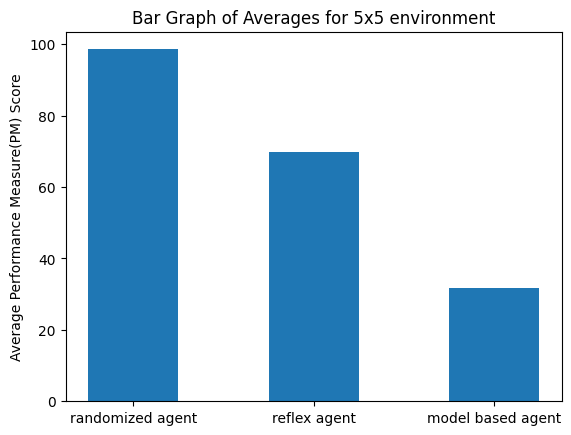

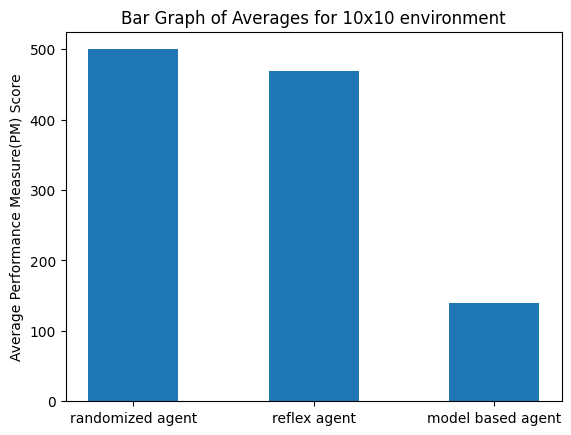

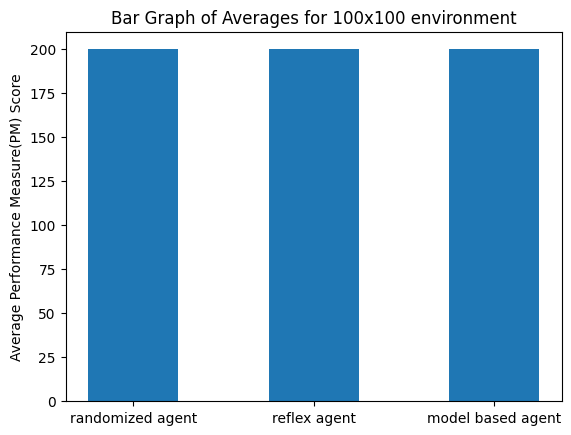

In [171]:
# Your graphs and discussion of the results goes here
#line charts, etc. to compare results. Compare the Model based with simple reflex agents.
#P values in stats to compare results!!!

#imports for graphs
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#store three averages in arrays
averageGroup5 = ([average_randomized_5, average_reflex_5, average_model_5])
print("AverageGroup5:", averageGroup5)

averageGroup10 = ([average_randomized_10, average_reflex_10, average_model_10])
print("AverageGroup10:", averageGroup10)

averageGroup100 = ([average_randomized_100, average_reflex_100, average_model_100])
print("AverageGroup100:", averageGroup100)

#make bar plots for each array to compare agents performance across different room sizes
#Creating an array for the x-axis labels
labels = ['randomized agent', 'reflex agent', 'model based agent']

#Creating the plot for the 5x5 room environment averages
#Setting the positions and width for the bars
positions = range(len(averageGroup5))
width = 0.5  # the width of the bars

#Plotting the bar graph
plt.bar(positions, averageGroup5, width, align='center')

#Adding labels and title (optional)
plt.xticks(positions, labels)
plt.ylabel('Average Performance Measure(PM) Score')
plt.title('Bar Graph of Averages for 5x5 environment')

#Display the plot
plt.show()

#Creating the plot for the 10x10 room environment averages
#Setting the positions and width for the bars
positions = range(len(averageGroup10))
width = 0.5  # the width of the bars

#Plotting the bar graph
plt.bar(positions, averageGroup10, width, align='center')

#Adding labels and title (optional)
plt.xticks(positions, labels)
plt.ylabel('Average Performance Measure(PM) Score')
plt.title('Bar Graph of Averages for 10x10 environment')

#Display the plot
plt.show()


#Creating the plot for the 100x100 room environment averages
#Setting the positions and width for the bars
positions = range(len(averageGroup100))
width = 0.5  # the width of the bars

#Plotting the bar graph
plt.bar(positions, averageGroup100, width, align='center')

#Adding labels and title (optional)
plt.xticks(positions, labels)
plt.ylabel('Average Performance Measure(PM) Score')
plt.title('Bar Graph of Averages for 100x100 environment')

#Display the plot
plt.show()

These bar graphs show the average performance differences between each agent.

The randomized agent has the highest performance measure (PM) because this agent randomly moves around, cleans every single square, and bumps into walls. This behavior wastes actions, so the randomized agent is the most inefficient agent and uses the most PM. In the 5x5 room test the max steps were set to 100 and the PM came out to 98.55, so this agent cleaned only 1.45% of the rooms. In the 10x10 room test, the max steps were set to 500, and the PM came out to 500, so the agent did not clean any of the rooms.

The reflex agent randomly moves around, but only cleans squares when they are dirty and uses the bumper sensors to avoid bumping into walls. This agent is slightly more efficient, having a middle of the road PM score. In the 5x5 room test the max steps were set to 100 and the PM came out to 69.84, so this agent cleaned 30.16% of the rooms. In the 10x10 room test, the max steps were set to 500, and the PM came out to 468.65, so the agent cleaned 6.27% of rooms, which is a worser performance than the 5x5 test case. This worser performance makes sense because the room was larger.   

The model based agent finds the northwest corner of the room, moves south until hitting the south wall, moves one square to the east, moves north until hitting the north wall, moves one square to the east, then moves south again. The agent cleans the squares as it moves in this pattern, making it the most efficient agent with the lowest PM score out of the three. In the 5x5 room test the max steps were set to 100 and the PM came out to 31.6, so this agent cleaned 68.4% of the rooms. In the 10x10 room test, the max steps were set to 500, and the PM came out to 139.63, so the agent cleaned 72.074% of the rooms.

The amount of max_steps needed for each agent to fully clean a 100x100 room is impractical to test, so the data from the 100x100 test shows all agents failing to clean the room because not enough max_steps were provided for the agents. However, the 100x100 room test does show how quickly these types of situations exponentially grow in size.

## Task 5: Robustness of the agent implementations [10 Points]

Describe how **your agent implementations** will perform

* if it is put into a rectangular room with unknown size,
* if the cleaning area can have an irregular shape (e.g., a hallway connecting two rooms), or
* if the room contains obstacles (i.e., squares that it cannot pass through and trigger the bumper sensors).

In [62]:
# Answer goes here
# ROBUSTNESS: Answer these!

#NO CODE IN THIS SECTION. THIS SECTION IS ON WHAT WE THINK. THIS SHOULD BE VERY SHORT --- examples like "if I bump into a wall, then robot cannot clean etc."

# if it is put into a rectangular room with unknown size,
# if the cleaning area can have an irregular shape (e.g., a hallway connecting two rooms) (DO NOT HAVE TO IMPLEMENT THIS IRREG. ENVIRONMENT BUT WE NEED TO DECIDE IF OUR ROBOT CAN DO THIS ROOM SHAPE OR NOT), or
# if the room contains obstacles (i.e., squares that it cannot pass through and trigger the bumper sensors).

#description in text box below

**Rectangular Room with Unknown Size:**

The randomized agent will clean this room if given enough max_steps.

The reflex agent will will clean this room if given enough max_steps.

The model based agent will clean this room if given enough max_steps.



**Irregularly Shaped Room --- Hallway connecting two Rooms**:

The randomized agent will clean this room if given enough max_steps.

The reflex agent will clean this room if given enough max_steps.

The model based agent will clean this room if given enough max_steps as long as the model based agent can find the top left corner of the room. The room has to be a rectangular or square shape (room/hallway), otherwise the model based agent will not be able to clean the room.



**Room with Obstacles**:

The randomized agent will clean this room if given enough steps and if the obstacles do not trap the agent in a corner.

The reflex agent will clean this room if given eough steps and if the obstacles do not trap the agent in a corner.

The model based agent will not clean this entire room because an obstacle will offset its south, east, north, east movement pattern and the model based agent will not visit every square.


## Advanced task: Obstacles

* __Graduate students__ need to complete this task [10 points]
* __Undergraduate students__ can attempt this as a bonus task [max +5 bonus points].

1. Change your simulation environment tor run experiments for the following problem: Add random obstacle squares that also trigger the bumper sensor. The agent does not know where the obstacles are. Observe how this changes the performance of the three implementations.

2. Describe what would need to be done to perform better with obstacles. Add code if you can.

In [63]:
# Your code and discussion goes here - #BONUS TASK FOR UNDERGRADUATE STUDENTS
#NOT REQUIRED TO PROVIDE CODE....

## More advanced implementation tasks

* __Agent for and environment with obstacles:__ Implement an agent for an environment where the agent does not know how large the environment is (we assume it is rectangular), where it starts or where the obstacles are. An option would be to always move to the closest unchecked/uncleaned square (note that this is actually depth-first search).

* __Utility-based agent:__ Change the environment for a $5 \times 5$ room, so each square has a fixed probability of getting dirty again. For the implementation, we give the environment a 2-dimensional array of probabilities. The utility of a state is defined as the number of currently clean squares in the room. Implement a utility-based agent that maximizes the expected utility over one full charge which lasts for 100000 time steps. To do this, the agent needs to learn the probabilities with which different squares get dirty again. This is very tricky!

In [64]:
# Your ideas/code -